In [2]:
from tensorflow import keras
import numpy as np

In [3]:
def construct_autoencoder(n, l, act_layer_config, lin_layer_config):
    # First build the encoder
    input_ = keras.layers.Input(shape=n)
    hidden1 = keras.layers.Dense(n, **act_layer_config)(input_)
    hidden2 = keras.layers.Dense(n, **act_layer_config)(hidden1)
    hidden3 = keras.layers.Dense(n, **lin_layer_config)(hidden2)
    added = keras.layers.Add()([input_, hidden3])
    latentspace = keras.layers.Dense(l, **lin_layer_config)(added)
    encoder = keras.Model(inputs=[input_], outputs=[latentspace])
    # Now the decoder
    latent_ = keras.layers.Input(shape=l)
    hidden4 = keras.layers.Dense(n, **lin_layer_config)(latent_)
    hidden5 = keras.layers.Dense(n, **act_layer_config)(hidden4)
    hidden6 = keras.layers.Dense(n, **act_layer_config)(hidden5)
    hidden7 = keras.layers.Dense(n, **act_layer_config)(hidden6)
    added_ = keras.layers.Add()([hidden4, hidden7])
    decoder = keras.Model(inputs=[latent_], outputs=[added_])
    # Tie them together
    autoencoder = keras.models.Sequential([encoder, decoder])
    # And return the autoencoder model
    return autoencoder

In [4]:
data_name = 'Duffing_Equation_expt4'  ## FILL IN HERE (from file name)

# data is num_steps x num_examples x n
data_train_u = np.load(('../data/%s_train1_u.npy' % (data_name)))
data_train_f = np.load(('../data/%s_train1_f.npy' % (data_name)))

# data is num_steps x num_examples x n
data_val_u = np.load(('../data/%s_val_u.npy' % (data_name)))
data_val_f = np.load(('../data/%s_val_f.npy' % (data_name)))

# data is num_steps x num_examples x n
data_test_u = np.load(('../data/%s_test2_u.npy' % (data_name)))
data_test_f = np.load(('../data/%s_test2_f.npy' % (data_name)))

In [6]:
import matplotlib.pyplot as plt

def plot_set(dset):
    plt.figure()
    print(dset.shape[0])
    for i in range(dset.shape[0]):
        plt.plot(dset[i,:])
    plt.show()

test f :
438


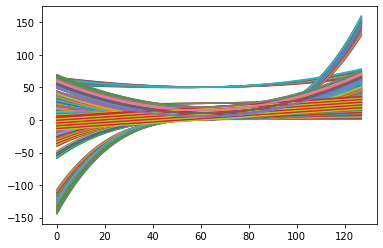

train_f :
4798


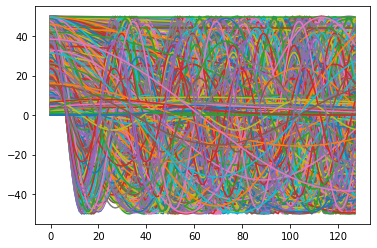

valid_f :
1200


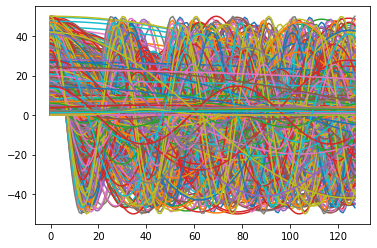

In [7]:
to_plot = { 'test f': data_test_f, 'train_f': data_train_f, 'valid_f': data_val_f}
for dset in to_plot:
    print(dset,":")
    plot_set(to_plot[dset])

test u :
438


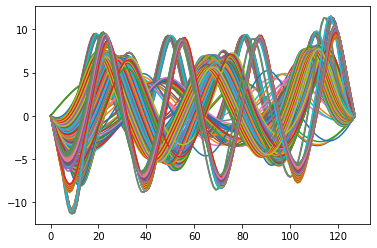

train_f :
4798


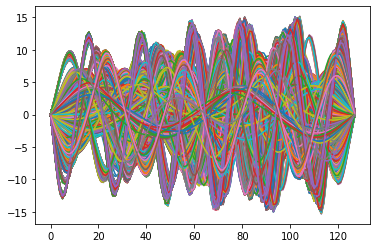

valid_f :
1200


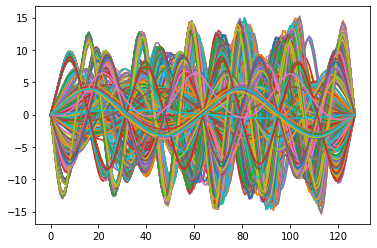

In [8]:
to_plot = { 'test u': data_test_u, 'train_u': data_train_u, 'valid_u': data_val_u}
for dset in to_plot:
    print(dset,":")
    plot_set(to_plot[dset])

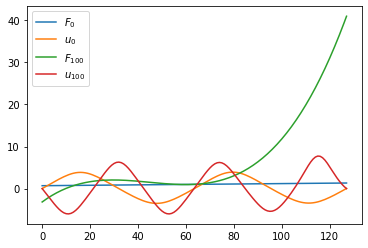

In [18]:
plt.figure()
for i in [0,100]:
    plt.plot(data_test_f[i], label="$F_{{{}}}$".format(i))
    plt.plot(data_test_u[i], label="$u_{{{}}}$".format(i))
plt.legend()
plt.show()

In [4]:
_, n = data_train_u.shape
l = int(n/4)
l = n

print("Training contains:", data_train_u.shape[0], "samples.")
print("Validation contains:", data_val_u.shape[0], "samples.")
print("Input vector is", n, "neurons and latent space is", l, "neurons.")

Training contains: 4798 samples.
Validation contains: 1200 samples.
Input vector is 128 neurons and latent space is 128 neurons.


In [5]:
# Set the configuration to be used for layers with activation functions and linear, non-activated functions
act_layer = dict(activation="relu", kernel_initializer='he_normal')
act_layer = dict(activation="elu", kernel_initializer='he_normal')
lin_layer = dict(activation=None)

# Encoder for u and encoder for f
u_autoenc = construct_autoencoder(n, l, act_layer, lin_layer)
f_autoenc = construct_autoencoder(n, l, act_layer, lin_layer)

# Set the optimizer to be used
optimizer = keras.optimizers.SGD(lr=0.01)
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Compile the autoencoders
u_autoenc.compile(loss="mse", optimizer=optimizer)
f_autoenc.compile(loss="mse", optimizer=optimizer)

# Specify fit options
u_cb = keras.callbacks.ModelCheckpoint("uae.h5", save_best_only=True)
f_cb = keras.callbacks.ModelCheckpoint("fae.h5", save_best_only=True)
fit_options = dict(batch_size = 5, epochs = 500)


In [6]:
%%time
u_hist = u_autoenc.fit(x=data_train_u, y=data_train_u, 
                       validation_data=(data_val_u, data_val_u),
                       callbacks=[u_cb],
                       **fit_options)

Train on 4798 samples, validate on 1200 samples
Epoch 1/500
4798/4798 [==============================] - 2s 475us/sample - loss: 2.8157 - val_loss: 0.2816
Epoch 2/500
4798/4798 [==============================] - 2s 373us/sample - loss: 0.2491 - val_loss: 0.1325
Epoch 3/500
4798/4798 [==============================] - 2s 373us/sample - loss: 0.1403 - val_loss: 0.0779
Epoch 4/500
4798/4798 [==============================] - 2s 369us/sample - loss: 0.0873 - val_loss: 0.0711
Epoch 5/500
4798/4798 [==============================] - 2s 375us/sample - loss: 0.1208 - val_loss: 0.0356
Epoch 6/500
4798/4798 [==============================] - 2s 361us/sample - loss: 0.0825 - val_loss: 0.0410
Epoch 7/500
4798/4798 [==============================] - 2s 360us/sample - loss: 0.0829 - val_loss: 0.0552
Epoch 8/500
4798/4798 [==============================] - 2s 356us/sample - loss: 0.0940 - val_loss: 0.2131
Epoch 9/500
4798/4798 [==============================] - 2s 357us/sample - loss: 0.0462 - val_lo

4798/4798 [==============================] - 2s 444us/sample - loss: 0.0100 - val_loss: 0.0147
Epoch 152/500
4798/4798 [==============================] - 2s 444us/sample - loss: 0.0111 - val_loss: 0.0159
Epoch 153/500
4798/4798 [==============================] - 2s 450us/sample - loss: 0.0102 - val_loss: 0.0103
Epoch 154/500
4798/4798 [==============================] - 2s 440us/sample - loss: 0.4247 - val_loss: 0.0690
Epoch 155/500
4798/4798 [==============================] - 2s 434us/sample - loss: 0.0106 - val_loss: 0.0072
Epoch 156/500
4798/4798 [==============================] - 2s 432us/sample - loss: 0.0071 - val_loss: 0.0124
Epoch 157/500
4798/4798 [==============================] - 2s 419us/sample - loss: 0.0076 - val_loss: 0.0118
Epoch 158/500
4798/4798 [==============================] - 2s 434us/sample - loss: 0.0124 - val_loss: 0.0069
Epoch 159/500
4798/4798 [==============================] - 2s 448us/sample - loss: 0.0104 - val_loss: 0.0279
Epoch 160/500
4798/4798 [========

4798/4798 [==============================] - 2s 426us/sample - loss: 0.0170 - val_loss: 0.0066
Epoch 302/500
4798/4798 [==============================] - 2s 420us/sample - loss: 0.0212 - val_loss: 0.0094
Epoch 303/500
4798/4798 [==============================] - 2s 417us/sample - loss: 0.0121 - val_loss: 0.0061
Epoch 304/500
4798/4798 [==============================] - 2s 415us/sample - loss: 0.0120 - val_loss: 0.0130
Epoch 305/500
4798/4798 [==============================] - 2s 418us/sample - loss: 0.0101 - val_loss: 0.0168
Epoch 306/500
4798/4798 [==============================] - 2s 416us/sample - loss: 0.0328 - val_loss: 0.0041
Epoch 307/500
4798/4798 [==============================] - 2s 417us/sample - loss: 0.0075 - val_loss: 0.0384
Epoch 308/500
4798/4798 [==============================] - 2s 419us/sample - loss: 0.0089 - val_loss: 0.0143
Epoch 309/500
4798/4798 [==============================] - 2s 422us/sample - loss: 0.0282 - val_loss: 0.0201
Epoch 310/500
4798/4798 [========

4798/4798 [==============================] - 2s 424us/sample - loss: 0.7606 - val_loss: 1.3244
Epoch 452/500
4798/4798 [==============================] - 2s 422us/sample - loss: 0.7387 - val_loss: 0.4864
Epoch 453/500
4798/4798 [==============================] - 2s 424us/sample - loss: 0.4984 - val_loss: 0.3094
Epoch 454/500
4798/4798 [==============================] - 2s 425us/sample - loss: 0.4533 - val_loss: 0.3389
Epoch 455/500
4798/4798 [==============================] - 2s 424us/sample - loss: 0.2255 - val_loss: 0.2891
Epoch 456/500
4798/4798 [==============================] - 2s 424us/sample - loss: 0.2287 - val_loss: 0.1072
Epoch 457/500
4798/4798 [==============================] - 2s 428us/sample - loss: 0.1603 - val_loss: 0.0770
Epoch 458/500
4798/4798 [==============================] - 2s 426us/sample - loss: 0.0922 - val_loss: 0.1225
Epoch 459/500
4798/4798 [==============================] - 2s 425us/sample - loss: 0.0593 - val_loss: 0.0501
Epoch 460/500
4798/4798 [========

In [7]:
%%time
f_hist = f_autoenc.fit(x=data_train_f, y=data_train_f, 
                       validation_data=(data_val_f, data_val_f),
                       callbacks=[f_cb],
                       **fit_options)

Train on 4798 samples, validate on 1200 samples
Epoch 1/500
4798/4798 [==============================] - 3s 538us/sample - loss: 19.2843 - val_loss: 0.4248
Epoch 2/500
4798/4798 [==============================] - 2s 454us/sample - loss: 0.5738 - val_loss: 0.3871
Epoch 3/500
4798/4798 [==============================] - 2s 436us/sample - loss: 1.0041 - val_loss: 0.7914
Epoch 4/500
4798/4798 [==============================] - 2s 440us/sample - loss: 1.1915 - val_loss: 1.0391
Epoch 5/500
4798/4798 [==============================] - 2s 434us/sample - loss: 1.8099 - val_loss: 1.0665
Epoch 6/500
4798/4798 [==============================] - 2s 434us/sample - loss: 1.5280 - val_loss: 1.6295
Epoch 7/500
4798/4798 [==============================] - 2s 453us/sample - loss: 2.3205 - val_loss: 0.2544
Epoch 8/500
4798/4798 [==============================] - 2s 433us/sample - loss: 1.4843 - val_loss: 0.9084
Epoch 9/500
4798/4798 [==============================] - 2s 432us/sample - loss: 0.8336 - val_l

4798/4798 [==============================] - 2s 428us/sample - loss: 0.4570 - val_loss: 0.0396
Epoch 152/500
4798/4798 [==============================] - 2s 425us/sample - loss: 0.2589 - val_loss: 0.2367
Epoch 153/500
4798/4798 [==============================] - 2s 425us/sample - loss: 0.1972 - val_loss: 0.1992
Epoch 154/500
4798/4798 [==============================] - 2s 425us/sample - loss: 0.5452 - val_loss: 0.1526
Epoch 155/500
4798/4798 [==============================] - 2s 427us/sample - loss: 0.0923 - val_loss: 0.0467
Epoch 156/500
4798/4798 [==============================] - 2s 427us/sample - loss: 0.3981 - val_loss: 0.0455
Epoch 157/500
4798/4798 [==============================] - 2s 436us/sample - loss: 0.1157 - val_loss: 0.4028
Epoch 158/500
4798/4798 [==============================] - 2s 431us/sample - loss: 6.1155 - val_loss: 0.0997
Epoch 159/500
4798/4798 [==============================] - 2s 431us/sample - loss: 0.2485 - val_loss: 0.2362
Epoch 160/500
4798/4798 [========

Epoch 226/500
4798/4798 [==============================] - 2s 433us/sample - loss: 7.3578 - val_loss: 0.8102
Epoch 227/500
4798/4798 [==============================] - 2s 432us/sample - loss: 0.4451 - val_loss: 0.3096
Epoch 228/500
4798/4798 [==============================] - 2s 429us/sample - loss: 0.4494 - val_loss: 0.2043
Epoch 229/500
4798/4798 [==============================] - 2s 442us/sample - loss: 1.4706 - val_loss: 0.1939
Epoch 230/500
4798/4798 [==============================] - 2s 433us/sample - loss: 0.1106 - val_loss: 0.0840
Epoch 231/500
4798/4798 [==============================] - 2s 431us/sample - loss: 0.1653 - val_loss: 0.2582
Epoch 232/500
4798/4798 [==============================] - 2s 434us/sample - loss: 0.4441 - val_loss: 0.4326
Epoch 233/500
4798/4798 [==============================] - 2s 432us/sample - loss: 0.2796 - val_loss: 0.0734
Epoch 234/500
4798/4798 [==============================] - 2s 432us/sample - loss: 0.2864 - val_loss: 4.5583
Epoch 235/500
4798/

4798/4798 [==============================] - 2s 424us/sample - loss: 1.3171 - val_loss: 0.0152
Epoch 377/500
4798/4798 [==============================] - 2s 414us/sample - loss: 0.0186 - val_loss: 0.0363
Epoch 378/500
4798/4798 [==============================] - 2s 413us/sample - loss: 0.0959 - val_loss: 0.1218
Epoch 379/500
4798/4798 [==============================] - 2s 414us/sample - loss: 0.1605 - val_loss: 0.0292
Epoch 380/500
4798/4798 [==============================] - 2s 412us/sample - loss: 0.8999 - val_loss: 9.3090
Epoch 381/500
4798/4798 [==============================] - 2s 412us/sample - loss: 0.3387 - val_loss: 0.0147
Epoch 382/500
4798/4798 [==============================] - 2s 414us/sample - loss: 0.0357 - val_loss: 0.0793
Epoch 383/500
4798/4798 [==============================] - 2s 420us/sample - loss: 0.1402 - val_loss: 0.0112
Epoch 384/500
4798/4798 [==============================] - 2s 437us/sample - loss: 0.1249 - val_loss: 0.0306
Epoch 385/500
4798/4798 [========

In [8]:
ua_results = u_autoenc.evaluate(data_test_u, data_test_u)
fa_results = f_autoenc.evaluate(data_test_f, data_test_f)

438/438 [==============================] - 0s 142us/sample - loss: 595173297.3372


In [9]:
import tensorflow as tf

for weight in u_hist.model.layers[0].weights:
    print(tf.math.reduce_max(weight), tf.math.reduce_min(weight), tf.math.reduce_mean(weight))

tf.Tensor(0.88029325, shape=(), dtype=float32) tf.Tensor(-1.207186, shape=(), dtype=float32) tf.Tensor(-0.0032791644, shape=(), dtype=float32)
tf.Tensor(2.518941, shape=(), dtype=float32) tf.Tensor(-5.975736, shape=(), dtype=float32) tf.Tensor(-3.6603355, shape=(), dtype=float32)
tf.Tensor(0.9191024, shape=(), dtype=float32) tf.Tensor(-1.401063, shape=(), dtype=float32) tf.Tensor(0.11042495, shape=(), dtype=float32)
tf.Tensor(-0.15492533, shape=(), dtype=float32) tf.Tensor(-2.101323, shape=(), dtype=float32) tf.Tensor(-0.9610009, shape=(), dtype=float32)
tf.Tensor(1.0386809, shape=(), dtype=float32) tf.Tensor(-0.9509664, shape=(), dtype=float32) tf.Tensor(0.0012558345, shape=(), dtype=float32)
tf.Tensor(0.3862089, shape=(), dtype=float32) tf.Tensor(-0.36002228, shape=(), dtype=float32) tf.Tensor(0.031351637, shape=(), dtype=float32)
tf.Tensor(0.6584813, shape=(), dtype=float32) tf.Tensor(-0.7486017, shape=(), dtype=float32) tf.Tensor(-0.0014535505, shape=(), dtype=float32)
tf.Tensor(1.

In [ ]:
f_hist = f_autoenc.fit(x=data_train_f, y=data_train_f, 
                       validation_data=(data_val_f, data_val_f),
                       callbacks=[f_cb],
                       **fit_options)